<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns',200)
warnings.filterwarnings("ignore")
%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [3]:
# Read CSV
house = pd.read_csv("../../../IOD/DATA/Sacramento_transactions.csv")
house

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [5]:
house.zip=house.zip.astype('str')

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [7]:
house.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


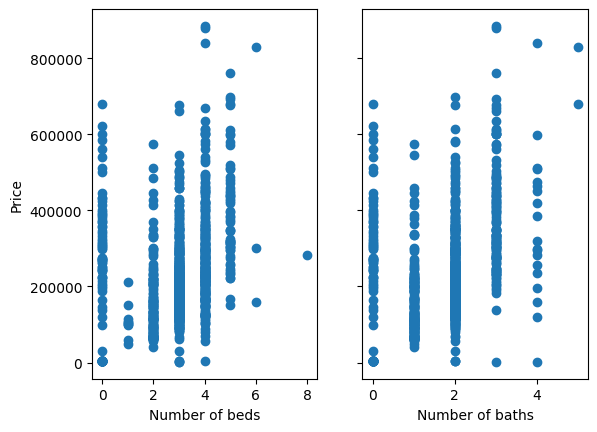

In [8]:
fig, ax = plt.subplots(1,2, sharey=True)

ax[0].scatter(house.beds, house.price)
ax[1].scatter(house.baths, house.price)
ax[0].set_xlabel("Number of beds")
ax[1].set_xlabel("Number of baths")
ax[0].set_ylabel("Price")

plt.show()

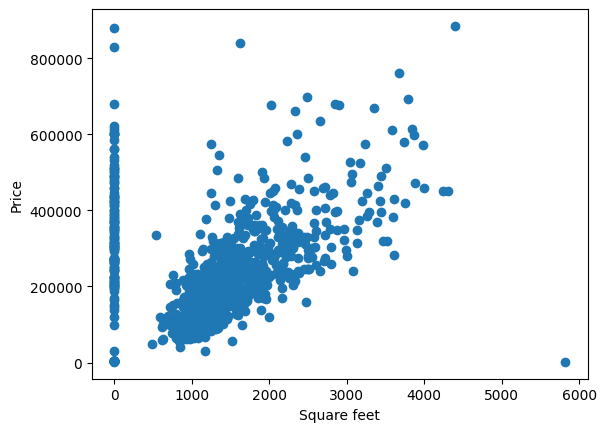

In [9]:
fig, ax = plt.subplots()

ax.scatter(house.sq__ft, house.price)
ax.set_xlabel("Square feet")
ax.set_ylabel("Price")
plt.show()

In [10]:
house[house.sq__ft == 0].shape[0]

171

In [11]:
# house[house.sq__ft == 0]
# Drop rows where sq__feet is zero
housev1= house[house['sq__ft'] != 0]

In [12]:
housev1

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


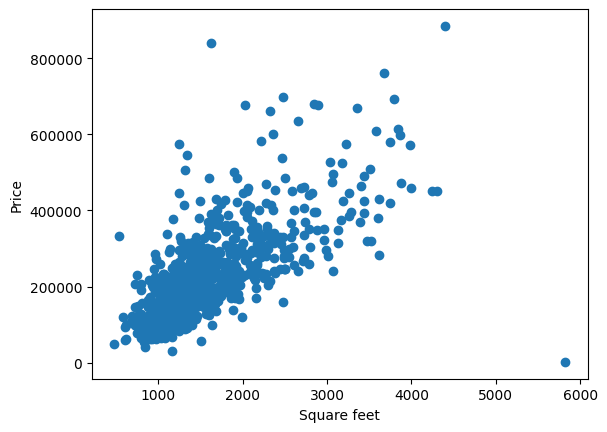

In [13]:
fig, ax = plt.subplots()

ax.scatter(housev1.sq__ft, housev1.price)
ax.set_xlabel("Square feet")
ax.set_ylabel("Price")
plt.show()

In [14]:
outlier= (housev1.price<10000) & (housev1.sq__ft !=0)
outlier

0      False
1      False
2      False
3      False
4      False
       ...  
980    False
981    False
982    False
983    False
984    False
Length: 814, dtype: bool

In [15]:
housev2=housev1[~outlier]

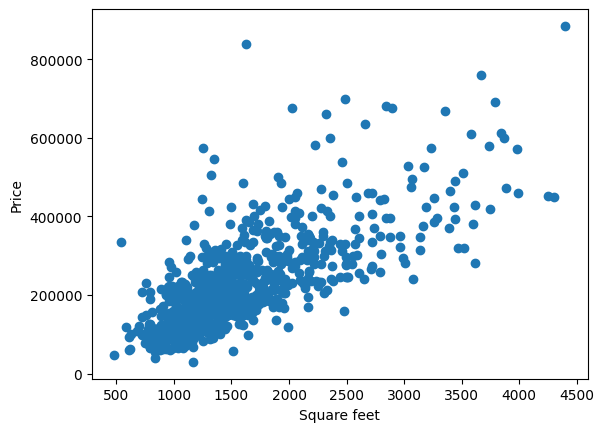

In [16]:
fig, ax = plt.subplots()

ax.scatter(housev2.sq__ft, housev2.price)
ax.set_xlabel("Square feet")
ax.set_ylabel("Price")
plt.show()

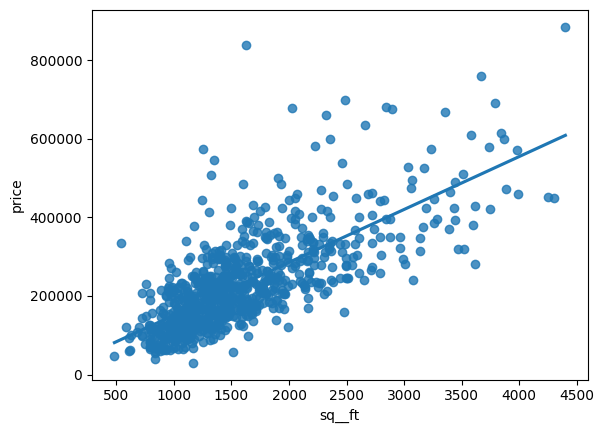

In [17]:
sns.regplot(data=housev2, x='sq__ft', y='price', ci=None)
plt.show()

In [18]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(housev2.sq__ft, housev2.price)
print(slope, intercept)

134.6408399368112 16195.545596351556


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [28]:
# ANSWER
# Price

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [29]:
# ANSWER
# beds, baths, type, sq__ft

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [30]:
# ANSWER
housev2.corr(numeric_only=True)

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.659631,0.716138,0.442322,-0.107719,0.057606
baths,0.659631,1.000000,0.723086,0.513007,-0.079154,0.101121
sq__ft,0.716138,0.723086,1.000000,0.728642,-0.100480,0.122898
price,0.442322,0.513007,0.728642,1.000000,0.057015,0.284571
latitude,-0.107719,-0.079154,-0.100480,0.057015,1.000000,0.347218
longitude,0.057606,0.101121,0.122898,0.284571,0.347218,1.000000


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [ ]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [54]:
# ANSWER
X_reshaped = housev2['sq__ft'].values.reshape(-1,1)
y = housev2['price']
reg = LinearRegression()
reg.fit(X_reshaped, y)

print(reg.coef_, reg.intercept_)

[134.64083994] 16195.54559635173


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [55]:
# ANSWER
reg.score(X_reshaped, y)

0.5309191055870073

### 3. Splitting Data

In [56]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [58]:
# ANSWER
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [65]:
# ANSWER
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(650,) (163,) (650,) (163,)


In [68]:
X_train_reshaped = X_train.values.reshape(-1,1)
X_test_reshaped = X_test.values.reshape(-1,1)

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [71]:
# ANSWER

reg=LinearRegression()
reg.fit(X_train_reshaped, y_train)

LinearRegression()

In [75]:
# ANSWER
reg.score(X_test_reshaped, y_test)
beta1=reg.coef_
beta0=reg.intercept_

print(beta1, beta0)

[137.25021702] 12760.898135031195


### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [77]:
# ANSWER
x=1204

pred=beta1*x + beta0

print(pred)

[178010.15942555]


#### Find the error

In [79]:
# Predict price from X_test
from sklearn.metrics import mean_squared_error

y_preds = reg.predict(X_test_reshaped)
mean_squared_error(y_test, y_preds, squared=True)

7221773250.982931



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



